Establish a relationship between:
1. price and house size
2. price and views - *done*
3. price and condition

Overall Questions:
1. What is the biggest influence on price?
2. Are more expensive houses an easier sell?

Increasing Views:
1. Views vs Price
2. Views vs Grade
3. Views cs condition

House Specs:
1. Size of living space vs Size of lot
2. Floors vs living space
3. House condition vs grade
4. How recently revovated vs views 

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.dropna(subset=['view'], how='all', inplace=True)

In [4]:
df.drop(columns='waterfront', axis=1, inplace= True)

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0.0,3,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925


In [6]:
# display(df.info())
# df.describe()

In [71]:
#df.corr()

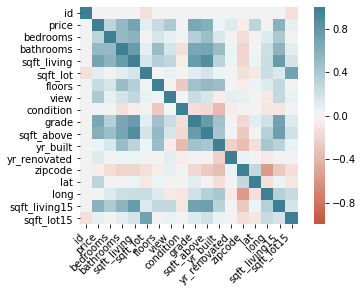

In [72]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [8]:
# df.isna().any()

In [9]:
# df.isna().sum()

In [10]:
# df.isnull().sum()

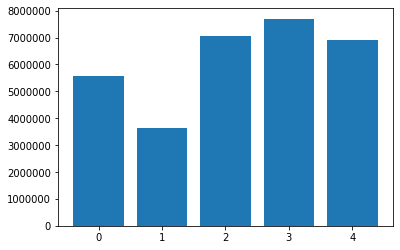

In [28]:
height = df['price']
bars = df['view']
 
plt.bar(bars, height)
 
plt.show()
 

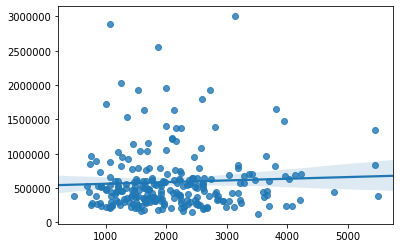

In [48]:
x = random.sample(list(df['sqft_living']), k=250)
y = random.sample(list(df['price']), k=250)

sns.regplot(x, y)
plt.show()


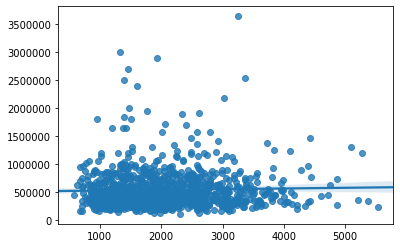

In [49]:
x = random.sample(list(df['sqft_living']), k=1000)
y = random.sample(list(df['price']), k=1000)

sns.regplot(x, y)
plt.show()

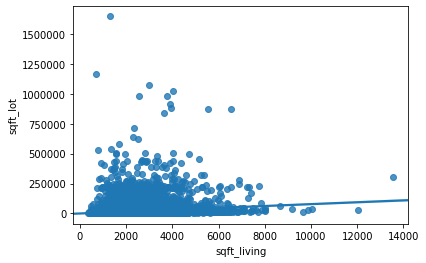

In [52]:
x = df['sqft_living']
y = df['sqft_lot']

sns.regplot(x , y)
plt.show()

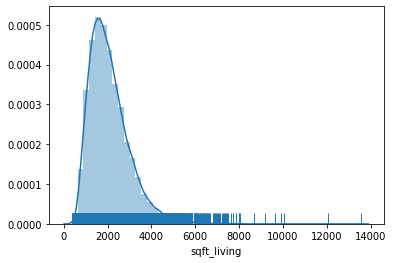

In [58]:
sns.distplot( df['sqft_living'], rug = True )
plt.show()

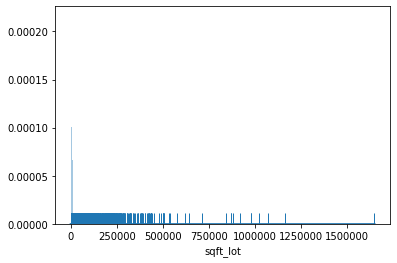

In [63]:
sns.distplot( df['sqft_lot'], rug = True, bins = 10000)
plt.show()

In [51]:
price_under_100k = df[df['price'] < 100000]
price_under_100k = price_under_100k['price']

In [50]:
price_100k_200k = df[(df['price'] > 100000 )& (df['price'] <= 200000)]
price_100k_200k = price_100k_200k['price']

In [18]:
price_200k_300k = df[(df['price'] > 150000 )& (df['price'] <= 200000)]
price_200k_300k = price_200k_300k['price']

In [19]:
price_300k_400k = df[(df['price'] > 200000 )& (df['price'] <= 250000)]
price_300k_400k = price_300k_400k['price']

In [27]:
price_400k_500k = df[(df['price'] > 200000 )& (df['price'] <= 250000)]
price_400k_500k = price_400k_500k['price']

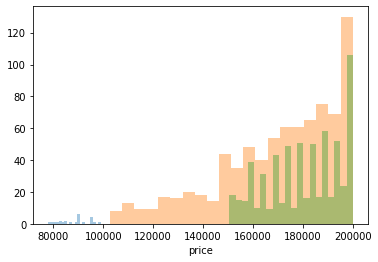

In [20]:
sns.distplot(price_under_100k, bins=20, hist=True, kde=False, rug=False)
sns.distplot(price_100k_200k, bins=20, hist=True, kde=False, rug=False)
sns.distplot(price_200k_300k, bins=20, hist=True, kde=False, rug=False)
plt.show()


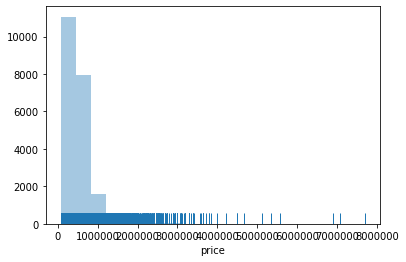

In [25]:
sns.distplot(df['price'], bins=20, hist=True, kde=False, rug=True)

In [41]:
sns.regplot(x=price_100k_200k, y=df['sqft_living'])
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [36]:
random.sample(list(df['sqft_living']), k=1000)

[2160,
 3720,
 2160,
 1240,
 3130,
 2560,
 1200,
 2560,
 1630,
 2240,
 1820,
 2080,
 1240,
 2220,
 1250,
 2340,
 2350,
 1660,
 1250,
 3510,
 2480,
 1430,
 1980,
 2210,
 1890,
 2650,
 1140,
 1670,
 1580,
 2950,
 2100,
 1630,
 1970,
 1870,
 1170,
 1180,
 1410,
 2990,
 1220,
 2030,
 860,
 2390,
 1980,
 1300,
 3273,
 1980,
 1820,
 800,
 810,
 1160,
 2770,
 2070,
 3900,
 1680,
 1340,
 2830,
 1840,
 1030,
 1740,
 3350,
 2000,
 2410,
 2120,
 2350,
 2210,
 1820,
 3830,
 2370,
 1660,
 840,
 1120,
 2550,
 1980,
 1550,
 3560,
 3290,
 1890,
 2100,
 2750,
 1610,
 1670,
 1610,
 1490,
 4060,
 1490,
 1640,
 3140,
 1030,
 2740,
 700,
 920,
 2470,
 2450,
 1470,
 2040,
 1500,
 2160,
 1750,
 2940,
 2060,
 3350,
 2170,
 1690,
 2190,
 2170,
 1040,
 1580,
 2120,
 2560,
 2900,
 2050,
 1070,
 1240,
 1330,
 1320,
 1880,
 2000,
 3130,
 2403,
 1270,
 2890,
 2253,
 1930,
 2800,
 1290,
 2290,
 2750,
 2630,
 4390,
 1710,
 1290,
 1160,
 3540,
 1790,
 2000,
 2990,
 2300,
 3510,
 2000,
 1730,
 2430,
 2410,
 2670,
 1710

In [ ]:
to do: random sample of price vs house size
    year built vs sq ft living